# 통계분석
***

- **t-검정**은 **두 집단의 평균**을 비교하기 위해 사용하는 방법. 방식에 따라 **일표본**, **독립표본**, **대응표본**으로 나누어 진다.
- **일원배치분산분석(ANOVA)**은 **두 개 이상 집단 평균 차이**에 대한 유의성 검증하는 방법.
- **교차분석**은 **범주형 자료**인 두 변수 간의 관계를 알아보는 방법. 가설에 따라 **적합도**, **독립성**, **동일성** 검정으로 나누어 사용되며 **카이제곱 검정 통계량**을 사용
***
## 1. T-검정(t-test)

In [48]:
from IPython.display import Image

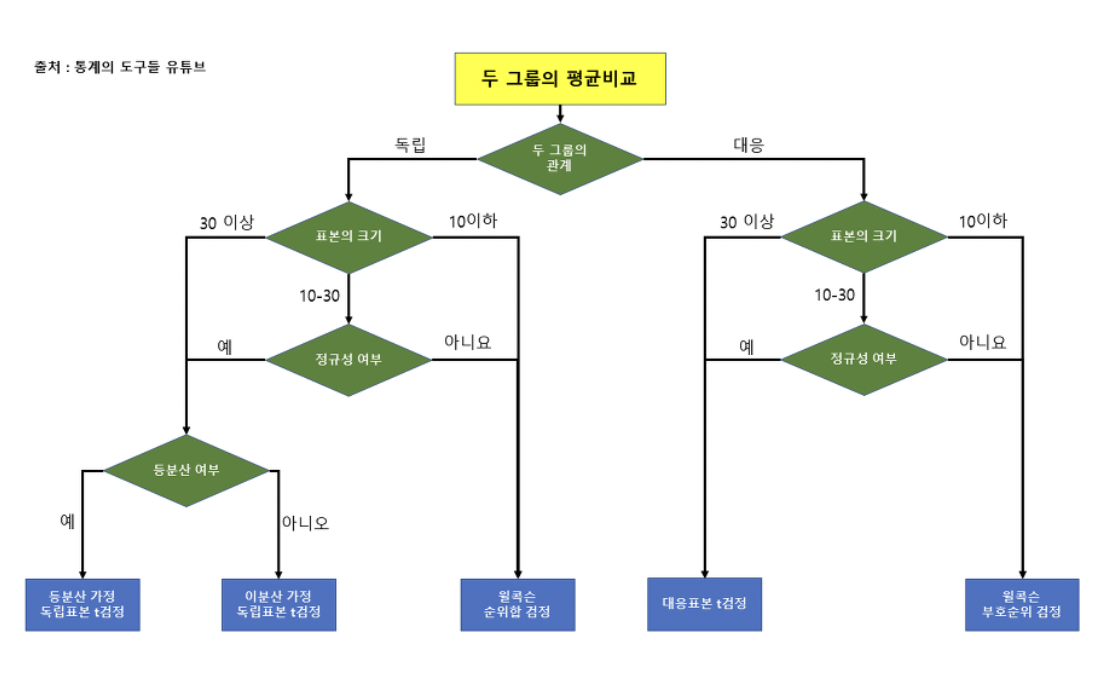

In [49]:
Image("ttest.png")

### 1-1. 일표본 t-검정
- **단일 모집단**에서 **연속형 변수의 평균값을 특정 기준값과 비교**

- 모집단의 구성요소들이 **정규분포**를 이룬다는 가정 하에 계산

- 표본의 크기가 **30** 보다 작으면 **중심극한정리**를 따른다고 보기 힘들기 때문에 정규성을 따로 검정해야한다.
- 정규성 검정시 **샤피로-윌크** 검정 수행
- 정규성 만족하지 못할 경우 윌콕슨의 부호 순위검정(Wilcoxon's signed rank test)

In [2]:
import pandas as pd

In [88]:
from scipy.stats import ranksums, wilcoxon, ks_2samp, ttest_1samp, shapiro, ttest_ind, ttest_rel, ttest_ind, bartlett, levene

In [132]:
data = pd.read_csv("world-happiness-report-2021.csv")

In [5]:
data.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


"Ladder Score"의 평균이 7.5와 같다고 할 수 있는지 검정해보자.

In [8]:
print(f"표본의 크기 n은 {data.shape[0]}")

표본의 크기 n은 149


만약 표본의 크기가 충분히 크지 않았다면 **샤피로-윌크 검정**시행

In [9]:
s_test = shapiro(data['Ladder score'])

In [10]:
print(f'shapiro의 통계량은 {round(s_test.statistic, 5)}이고 p-value는 {round(s_test.pvalue, 7)}')

shapiro의 통계량은 0.99125이고 p-value는 0.4894075


유의확률이 0.5로 귀무가설을 기각하지 못한다. 따라서 정규분포를 따른다고 할 수 있기 때문에 t-test를 수행할 수 있다.

In [12]:
one_sample_t_test = ttest_1samp(data['Ladder score'], 7.5)

In [13]:
print(f'일표본 t-검정의 일표본 t-통계량은 {round(one_sample_t_test.statistic, 5)}이고 p-value는 {round(one_sample_t_test.pvalue, 7)}')

일표본 t-검정의 일표본 t-통계량은 -22.35938이고 p-value는 0.0


In [14]:
print(f'해당 검정 결과 자유도는 {data.shape[0] - 1}이다.')

해당 검정 결과 자유도는 148이다.


**t-통계량**은 -22.35938이고 **p-value**는 0에 근사하므로 귀무가설을 기각하고 **"Ladder Score의 평균 점수는 7.5가 아니다"**라는 결론을 내릴 수 있다.
***
만약 정규성을 만족하지 못하면 **윌콕슨의 부호 순위 검정** 시행

In [50]:
wilcoxon(data['Ladder score'], alternative = 'two-sided')

WilcoxonResult(statistic=0.0, pvalue=3.356731457846044e-26)

"크다" or "작다"인 경우는 아래와 같이 진행

In [51]:
wilcoxon(data['Ladder score'] - 7.5, alternative = 'greater')

WilcoxonResult(statistic=21.0, pvalue=1.0)

***
## 1-2. 독립표본 t-검정

- **두 개의 독립된 모진단의 평균**을 비교
- **정규성을 만족**해야한다. 만족하지 않을 경우 **윌콕슨의 순위합 검정(Wilcoxon's rank sum test)**
- 두 모집단은 서로 **독립**이어야 한다.
- **등분산성**을 만족해야한다.


< 각 집단의 정규성 검정 >
- 표본의 크기가 30보다 크면 중심극한정리에 의해 정규성 만족
- 표본의 크기가 10 ~ 30이면 kolmogrov-Smirnov test or Shapiro-Wilk test
- 표본의 크기가 10보다 작으면 비모수적 방법 사용 : Mann-Whitney test or Wilcoxon Rank-Sum test

**서유럽**과 **남아시아**의 **Social support**의 평균 차이가 있는지 검정해보자.

In [20]:
e = data.loc[data['Regional indicator'] == 'Western Europe', 'Social support']
a = data.loc[data['Regional indicator'] == 'South Asia', 'Social support']

먼저 정규성을 검정한다.

In [41]:
df = data[(data['Regional indicator'] == 'South Asia') | (data['Regional indicator'] == 'Western Europe')]

In [42]:
s_test = shapiro(df['Social support'])

In [43]:
print(f'shapiro의 통계량은 {round(s_test.statistic, 5)}이고 p-value는 {round(s_test.pvalue, 7)}')

shapiro의 통계량은 0.77266이고 p-value는 3.65e-05


정규성 검정 결과 유의확률이 0에 근사하므로 '정규성을 만족한다'라는 귀무가설을 기각하지 못한다. 이후 **윌콕슨 순위합 검정**을 진행한다.

In [45]:
print(f'윌콕슨 순위합 검정의 t-통계량은 {round(ranksums(e, a).statistic, 5)}이고 p-value는 {round(ranksums(e, a).pvalue, 7)}')

윌콕슨 순위합 검정의 t-통계량은 3.31599이고 p-value는 0.0009132


검정결과 유의확률이 0에 근사하므로 두 집단간의 social support는 차이가 있다고 할 수 있다.
***
만약 정규성을 만족한다면 등분산성을 검정한다.

In [21]:
same_var_test = bartlett(e, a)

In [22]:
print(f'등분산 검정 결과 F-통계량은 {round(same_var_test.statistic, 4)}이고 p-value는 {round(same_var_test.pvalue, 4)}이다.')

등분산 검정 결과 F-통계량은 13.9661이고 p-value는 0.0002이다.


등분산 검정 결과 유의확률이 0에 근사하므로 귀무가설을 기각하고 두 집단의 데이터는 등분산을 만족하지 않는다고 할 수 있다.

이 때 등분산성이 만족되지 않으면 인자에 equal_var = False를 입력한다.

In [23]:
ind_sample_t_test = ttest_ind(e, a, equal_var = False)

In [24]:
print(f'독립표본 t-검정의 독립표본 t-통계량은 {round(ind_sample_t_test.statistic, 5)}이고 p-value는 {round(ind_sample_t_test.pvalue, 7)}')

독립표본 t-검정의 독립표본 t-통계량은 3.66033이고 p-value는 0.0093782


t-검정 수행 결과 통계량은 3.66이고 유의확률은 0에 근사한다. 따라서 **귀무가설을 기각**하고 **두 집단의 평균의 차이는 통계적으로 유의하다**고 할 수 있다.

***
## 1-3. 대응표본 t-검정

- 단일 모집단에 대해 **두 번의 처리** 후 평균 차이 비교

In [29]:
v1 = [3, 6, 10, 12, 45, 192, 435, 5, 67]
v2 = [294, 342, 6, 9, 15, 50, 72, 99, 33]

In [30]:
paired_t_test = ttest_rel(v1, v2)

In [31]:
print(f'대응표본 t-검정의 대응표본 t-통계량은 {round(paired_t_test.statistic, 5)}이고 p-value는 {round(paired_t_test.pvalue, 7)}')

대응표본 t-검정의 대응표본 t-통계량은 -0.22845이고 p-value는 0.8250262


t-통계량은 -0.23이고 유의확률은 0.83으로 유의수준(0.05) 보다 크기 때문에 '두 방법에 따른 평균의 차이는 없다'라는 귀무가설을 채택한다.
***
# 2. 분산분석(ANOVA)

- 두 개 이상의 집단에서 집단 평균 간 차이를 그룹내 변동에 비교

| 분석구분 | 분석명칭 | 독립변수 개수 | 종속변수 개수|
| --- | --- | ---| --- |
|| 일원배치 분산분석(One-way ANOVA) | 1개 | 1개
|단일변량분산분석|이원배치 분산분석(Two-way ANOVA)|2개|1개|
||다원배치 분산분석(Multi-way ANOVA)|3개 이상|1개|
|다변량 분산분석| MANOVA | 1개 이상| 2개 이상|


## 2-1. 일원배치 분산 분석
- 하나의 범주형 변수의 영향 탐색
- F-통계량 이용

|요인 | 제곱합(SS) | 자유도(df) | 평균제곱(MS) | 분산비(F) |
|---| ---| ---|---|---|
|처리| SSA | k - 1 | MSA | F = MSA / MSE |
| 오차 | SSE | N - k | MSE | |
| 전체 | SST | N - 1 | | |

< 가정 >
- 각 집단의 측정치는 서로 **독립**이며 **정규분포**를 따른다.
- **등분산성**

< 가설 >
- 귀무가설 : 집단 간 모평균에는 차이가 없다.
- 대립가설 : 집단 간 모평균이 모두 같다고 할 수 없다.

< 사후 검정 >
- Duncan's MRT, Fisher's LSD, Tukey's HSD, Scheffe etc.

In [64]:
from sklearn.datasets import load_iris

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [67]:
df = pd.DataFrame(load_iris().data, columns = load_iris().feature_names)
df['species'] = load_iris().target

In [68]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [69]:
df.columns = ['sl', 'sw', 'pl','pw', 'species']

각 집단의 정규성 확인

In [87]:
print(f'집단 0의 정규성 검정 결과 통계량은 {shapiro(df[df.species == 0].sw).statistic}이고 p-value는 {shapiro(df[df.species == 0].sw).pvalue}')
print(f'집단 1의 정규성 검정 결과 통계량은 {shapiro(df[df.species == 1].sw).statistic}이고 p-value는 {shapiro(df[df.species == 1].sw).pvalue}')
print(f'집단 2의 정규성 검정 결과 통계량은 {shapiro(df[df.species == 2].sw).statistic}이고 p-value는 {shapiro(df[df.species == 2].sw).pvalue}')

집단 0의 정규성 검정 결과 통계량은 0.97171950340271이고 p-value는 0.2715264856815338
집단 1의 정규성 검정 결과 통계량은 0.9741330742835999이고 p-value는 0.33798879384994507
집단 2의 정규성 검정 결과 통계량은 0.9673910140991211이고 p-value는 0.1809043288230896


모든 집단에서 유의확률이 유의수준 0.05보다 크므로 정규성을 만족한다고 할 수 있다.

이후 등분산성 검증을 시행한다.

In [92]:
levene(df[df.species == 0].sw, df[df.species == 1].sw, df[df.species == 2].sw)

LeveneResult(statistic=0.5902115655853319, pvalue=0.5555178984739075)

In [93]:
bartlett(df[df.species == 0].sw, df[df.species == 1].sw, df[df.species == 2].sw)

BartlettResult(statistic=2.0910752014391774, pvalue=0.35150280041581317)

유의확률이 0.05보다 크므로 등분산을 만족한다고 할 수 있다.

이후 일원배치분산분석을 진행한다.

In [75]:
model = ols('sw ~ C(species)', df).fit()

In [76]:
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(species),2.0,11.344933,5.672467,49.16004,4.492017e-17
Residual,147.0,16.962000,0.115388,NaN,NaN


SSA는 11.345이고 이 때 자유도는 3 - 1 = 2이다. SST의 자유도는 147(관측치 수 - 집단의 수 = 150 - 3). 유의확률이 0에 근사하므로 species에 따라 꽃받침  폭이 모두 동일하지는 않다고 할 수 있다. 즉 적어도 어느 하나의 종은 통계적으로 유의한 차이가 있다고 할 수 있다.

In [77]:
tukey = pairwise_tukeyhsd(df.sw, df.species.astype('category'), alpha = .05)

In [78]:
print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1   -0.658  0.001 -0.8189 -0.4971   True
     0      2   -0.454  0.001 -0.6149 -0.2931   True
     1      2    0.204 0.0088  0.0431  0.3649   True
----------------------------------------------------


Tukey의 사후분석 결과 모든 집단간 분석에서 차이가 통계적으로 유의한 것으로 나타났다. 또한 0과 1집단간의 차이가 가장 큰 것으로 나타났다. 

In [79]:
from statsmodels.sandbox.stats.multicomp import MultiComparison

In [80]:
comp = MultiComparison(df.sw, df.species.astype('category'))

In [82]:
result = comp.allpairtest(ttest_ind, method='bonf')
result[0]

group1,group2,stat,pval,pval_corr,reject
0,1,9.455,0.0,0.0,True
0,2,6.4503,0.0,0.0,True
1,2,-3.2058,0.0018,0.0055,True


***
## 2-2. 이원배치 분산분석

- 균형설계 : 각 집단 / 조건별 표본수가 동일
- 비균형설계 : 각 집단 / 조건별 표본수가 동일하지 않은 경우
- 두 방식에 따라 계산 방법이 다름

In [125]:
t_a = pd.read_csv('/Users/kisehyun/study_code/ADP/PART 05 실습용 데이터/credit_final.csv')

In [126]:
t_a.columns = [x.replace('.', '_') for x in t_a.columns]

In [127]:
t_a.head()

,credit_rating,account_balance,credit_duration_months,previous_credit_payment_status,credit_purpose,credit_amount,savings,employment_duration,installment_rate,marital_status,...,residence_duration,current_assets,age,other_credits,apartment_type,bank_credits,occupation,dependents,telephone,foreign_worker
0,1,1,18,3,2,1049,1,1,4,1,...,4,2,21,2,1,1,3,1,1,1
1,1,1,9,3,4,2799,1,2,2,3,...,2,1,36,2,1,2,3,2,1,1
2,1,2,12,2,4,841,2,3,2,1,...,4,1,23,2,1,1,2,1,1,1
3,1,1,12,3,4,2122,1,2,3,3,...,2,1,39,2,1,2,2,2,1,2
4,1,1,12,3,4,2171,1,2,4,3,...,4,2,38,1,2,2,2,1,1,2


In [128]:
t_a.groupby(['credit_rating', 'account_balance']).size().reset_index(name = '표본수')

,credit_rating,account_balance,표본수
0,0,1,135
1,0,2,105
2,0,3,60
3,1,1,139
4,1,2,164
5,1,3,397


표본 수가 모두 상이하므로 비균형설계 표본이다.

< 교호작용 >
- 주효과 : 다른 요인과 상관없이 집단에 따라 효과가 유의미하게 달라지는 경우
- 상호작용효과 : 한 요인의 수준에 따른 효과의 차이가 또 다른 요인의 수준에 따라 달라지는 경우

귀무가설 = 상호작용 효과가 없다.

대립가설 = 상호작용 효과가 있다.

In [129]:
model = ols('credit_amount ~ C(account_balance) + C(credit_rating) + C(credit_rating) : C(account_balance)', t_a).fit()

비균형설계의 경우 typ = 3 옵션을 추가한다.

In [130]:
anova_lm(model, typ = 3)

,sum_sq,df,F,PR(>F)
Intercept,1.573117e+09,1.0,204.535030,2.492324e-42
C(account_balance),1.108813e+08,2.0,7.208336,7.797308e-04
C(credit_rating),1.513140e+07,1.0,1.967370,1.610396e-01
C(credit_rating):C(account_balance),3.782618e+07,2.0,2.459061,8.603533e-02
Residual,7.645037e+09,994.0,NaN,NaN


account_balance만 통계적으로 유의하다. credit_rating과 account_balance에 의한 유의미한 상호작용효과는 발견할 수 없었다. 

In [131]:
pairwise_tukeyhsd(t_a.credit_amount, t_a.account_balance, alpha= 0.05).summary()

group1,group2,meandiff,p-adj,lower,upper,reject
1,2,652.4081,0.0187,87.4128,1217.4034,True
1,3,-173.7485,0.6799,-676.6948,329.1979,False
2,3,-826.1565,0.001,-1332.0166,-320.2964,True


집단1과 2, 집단 2와 3은 통계적으로 차이가 유의미하다.
***

## 3. 교차분석

- 범주형 자료인 두 변수 간의 관계를 알아보기 위해 실시하는 분석 기법
- **적합도, 독립성, 동일성** 검정에 사용
- **카이제곱 검정 통계량**을 이용

#### 적합도 검정 
- 실험에서 얻은 관측치들이 예상한 이론과 일치하는지에 대한 여부 검정
- 관측치들이 어떤 분포를 따르는지 알아볼 수 있다.
- **모집단 분포에 대한 가정이 옳게 됐는지**를 관측치와 비교하여 검정

In [142]:
from scipy.stats import chisquare, chi2_contingency

In [196]:
df = pd.read_csv("survey.csv").iloc[:, 1:]

In [197]:
df.head()

,Sex,Wr.Hnd,NW.Hnd,W.Hnd,Fold,Pulse,Clap,Exer,Smoke,Height,M.I,Age
0,Female,18.5,18.0,Right,R on L,92.0,Left,Some,Never,173.0,Metric,18.250
1,Male,19.5,20.5,Left,R on L,104.0,Left,None,Regul,177.8,Imperial,17.583
2,Male,18.0,13.3,Right,L on R,87.0,Neither,None,Occas,NaN,NaN,16.917
3,Male,18.8,18.9,Right,R on L,NaN,Neither,None,Never,160.0,Metric,20.333
4,Male,20.0,20.0,Right,Neither,35.0,Right,Some,Never,165.0,Metric,23.667


귀무가설 : 왼손잡이는 20%, 오른손잡이는 80%이다.

In [225]:
df['W.Hnd'].value_counts()

Right    218
Left      18
Name: W.Hnd, dtype: int64

In [221]:
ct = pd.DataFrame({'L' : [18, 47], 'R' : [218, 189]}, index = ['obs', 'exp'])
ct

,L,R
obs,18,218
exp,47,189


In [222]:
result = chisquare(ct.loc['obs'], f_exp = ct.loc['exp'])
result

Power_divergenceResult(statistic=22.343352471012047, pvalue=2.280009044943064e-06)

유의확률이 0에 근사하므로 '전체 응답자 중 왼손잡이는 20% 오른손잡이는 80%이다.'라는 귀무가설을 기각한다.
***
#### 독립성 검정

- 두 변수들 사이의 관계가 독립인지 아닌지 검정

이원카이제곱으로 교차분할표 생성

In [136]:
df = pd.read_csv('/Users/kisehyun/competition/데이콘_신용카드_사용자연체예측/train.csv')

In [140]:
ct = pd.crosstab(df.income_type, df.family_type)

In [157]:
ct

family_type,Civil marriage,Married,Separated,Single / not married,Widow
income_type,,,,,
Commercial associate,622,4146,348,978,108
Pensioner,269,2810,262,503,605
State servant,163,1544,115,271,61
Student,2,4,0,1,0
Working,1067,9692,814,1743,329


In [158]:
chi_2, p, dof, expected = chi2_contingency([ct.loc['Commercial associate'], ct.loc['Pensioner'], ct.loc['State servant'], ct.loc['Student'], ct.loc['Working']])

In [159]:
print(f'통계량은 {chi_2}')
print(f'유의확률은 {p}')
print(f'자유도는 {dof}') # 4(5 - 1) 곱하기 4(5 - 1) = 16
print('기대도수는')
display(pd.DataFrame(expected, index = ct.index, columns = ct.columns))

통계량은 1289.3510789945708
유의확률은 9.742319541004728e-265
자유도는 16
기대도수는


family_type,Civil marriage,Married,Separated,Single / not married,Widow
income_type,,,,,
Commercial associate,497.669653,4265.471973,360.769475,819.525721,258.563178
Pensioner,357.002948,3059.833088,258.797709,587.886155,185.480100
State servant,172.844313,1481.429641,125.297880,284.627282,89.800884
Student,0.561704,4.814302,0.407189,0.924973,0.291832
Working,1094.921382,9384.450996,793.727747,1803.035870,568.864006


귀무가설인 두 변수사이에는 연관이 없다(독립이다.)를 기각한다. 즉 두 변수 사이에는 연관이 있다고 할 수 있다.
***
#### 동질성 검정

- 모집단이 R개의 속성으로 범주화 되었을 때 R개의 부분 모집단에서 추출한 각 표본인 C개의 범주화된 집단의 분포는 서로 동일한지 아닌지를 검정.
- **교차표**를 활용하며 **계산법과 검증법은 독립성 검정과 같은 방법으로 진행**
- 귀무가설 = 모든 pn은 동일하다.
- 대립가설 = 다른 값이 하나 이상 존재한다.

***
## 3. 상관분석

| 구분 | 피어슨 | 스피어만|
|---| --- | --- |
| 개념 | 등간척도 이상으로 측정된 두 변수들간의 상관관계 측정 | 서열척도인 두 변수들의 상관관계 측정 |
| 특징 | 연속형 변수, 정규성 가정, 일반적으로 사용 | 순서형 변수, 비모수적 방법, 순위를 기준으로 상관관계 측정 |

In [228]:
from scipy.stats import pearsonr, spearmanr, kendalltau

In [229]:
df = pd.read_csv('/Users/kisehyun/study_code/ADP/3차시험대비/csv/datasets/mtcars.csv')

In [232]:
df.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [234]:
corr = pearsonr(df.mpg, df.hp)
print(f'피어슨 상관관계 검정 결과 상관계수는 {round(corr[0], 4)}이고 유의확률은 {round(corr[1], 4)}')

피어슨 상관수 검정 결과 상관계수는 -0.7762이고 유의확률은 0.0


In [235]:
corr = spearmanr(df.mpg, df.hp)
print(f'스피어만 상관관계 검정 결과 상관계수는 {round(corr[0], 4)}이고 유의확률은 {round(corr[1], 4)}')

스피어만 상관관계 검정 결과 상관계수는 -0.8947이고 유의확률은 0.0


In [236]:
corr = kendalltau(df.mpg, df.hp)
print(f'켄달 상관관계 검정 결과 상관계수는 {round(corr[0], 4)}이고 유의확률은 {round(corr[1], 4)}')

켄달 상관관계 검정 결과 상관계수는 -0.7428이고 유의확률은 0.0
